<a href="https://colab.research.google.com/github/abasilio91/estudos_redes_neurais_pytorch/blob/main/RNN_com_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Curso de Pytorch da Camila "Peixe Babel" Laranjeira da Alura

[link da trilha](https://unibb.alura.com.br/formacao-deep-learning-pytorch)

# Curso 1 - Introdução às redes neurais

dados criados artificialmente [esse link](https://drawdata.xyz/) e armazenados dentro do meu drive.

In [ ]:
# clone do repo do github

!git clone https://github.com/abasilio91/estudos_redes_neurais_pytorch

Cloning into 'estudos_redes_neurais_pytorch'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (10/10), 140.08 KiB | 2.55 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
# carrega dados

import pandas as pd

dados_classificacao_AB = pd.read_csv('/content/estudos_redes_neurais_pytorch/dados_classificacao_AB.csv')
dados_classificacao_AB

,x,y,z
0,159.829170,451.207218,a
1,213.110763,442.239943,a
2,128.881328,441.586327,a
3,172.679607,406.255250,a
4,219.658389,424.231318,a
...,...,...,...
693,311.745067,278.297268,b
694,320.416814,206.681836,b
695,322.487024,278.453773,b
696,347.483922,265.770815,b


<Axes: xlabel='x', ylabel='y'>

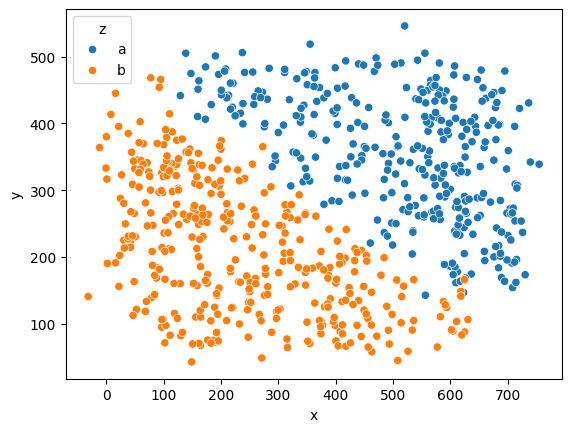

In [ ]:
# visualização dos dados

import seaborn as sns

sns.scatterplot(data=dados_classificacao_AB, x='x', y='y', hue='z')

In [ ]:
# Cria uma coluna de valores 0 ou 1 baseados no valores das classes de Z

dados_classificacao_AB['z_classe'] = dados_classificacao_AB.z.apply(lambda x: 0 if x == 'a' else 1)
dados_classificacao_AB

,x,y,z,z_classe
0,159.829170,451.207218,a,0
1,213.110763,442.239943,a,0
2,128.881328,441.586327,a,0
3,172.679607,406.255250,a,0
4,219.658389,424.231318,a,0
...,...,...,...,...
693,311.745067,278.297268,b,1
694,320.416814,206.681836,b,1
695,322.487024,278.453773,b,1
696,347.483922,265.770815,b,1


In [64]:
# Convertendo o dataframe em tensores

import torch

x_tensor = torch.tensor(dados_classificacao_AB[['x','y']].values).float()
y_tensor = torch.tensor(dados_classificacao_AB['z_classe'].values).float()

print(x_tensor)
print('-------------------------')
print(y_tensor)

tensor([[159.8292, 451.2072],
        [213.1108, 442.2399],
        [128.8813, 441.5863],
        ...,
        [322.4870, 278.4538],
        [347.4839, 265.7708],
        [346.6580, 263.5262]])
-------------------------
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [67]:
# cast na GPU

if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')
print(device)

x_tensor = x_tensor.to(device)
y_tensor = y_tensor.to(device)

cuda


In [ ]:
print(x_tensor)

tensor([[159.8292, 451.2072],
        [213.1108, 442.2399],
        [128.8813, 441.5863],
        ...,
        [322.4870, 278.4538],
        [347.4839, 265.7708],
        [346.6580, 263.5262]], device='cuda:0', dtype=torch.float64)


In [ ]:
print(y_tensor)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [36]:
# Visualização de um perceptron

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot3d(perceptron):
  w1, w2, w3 = perceptron.weight.data.numpy()[0]
  b = perceptron.bias.data.numpy()[0]

  X1 = np.linspace(-1,1,10)
  X2 = np.linspace(-1,1,10)

  X1,X2 = np.meshgrid(X1,X2)
  X3 = (b - w1*X1 + w2*X2)/w3

  fig = plt.figure(figsize=(10,8))
  ax = fig.add_subplot(projection='3d')
  ax.view_init(azim=270)

  ax.plot_surface(X1, X2, X3, cmap='plasma')

In [56]:
import torch.nn as nn

in_features = 3
out_features = 1
torch.manual_seed(666)

perceptron = nn.Linear(in_features, out_features)

plot3d(perceptron)

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

tensor([-1.5743], grad_fn=<ViewBackward0>)


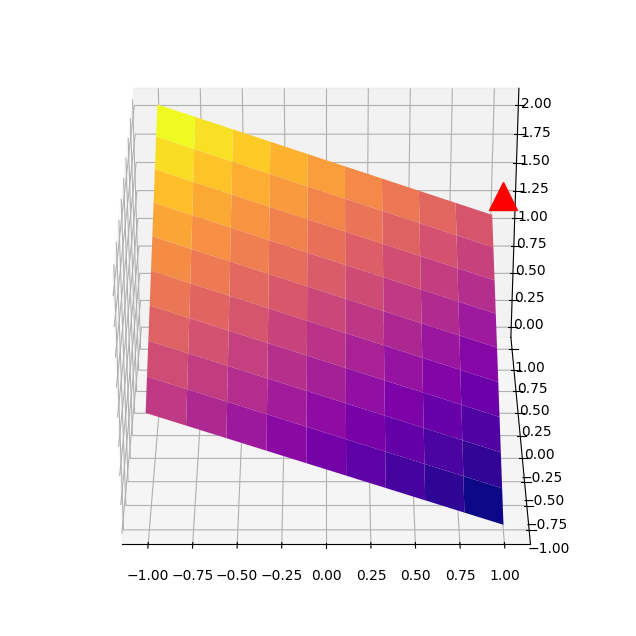

In [53]:
# Usando o perceptron na mão

X = torch.Tensor([1, 0, 2])
y = perceptron(X)

print(y)

plot3d(perceptron)
plt.plot([X[0]], [X[1]], [X[2]], color='r', marker='^', markersize=20)

In [57]:
# Criando as camadas das RNN usando Sequential

import torch.nn as nn

in_features = 2
out_features = 1
hidden_layers_size = 12
torch.manual_seed(666)

net = nn.Sequential(
    nn.Linear(in_features, hidden_layers_size), # camada escondida
    nn.ReLU(),   # camada de ativação não linear
    nn.Linear(hidden_layers_size, out_features)  # camada de saída
)
net.to(device)

print(net)

Sequential(
  (0): Linear(in_features=2, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=1, bias=True)
)


In [58]:
# usando torchsummary para visualização da rede

from torchsummary import summary

summary(net, input_size=(1, in_features))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 12]              36
              ReLU-2                [-1, 1, 12]               0
            Linear-3                 [-1, 1, 1]              13
Total params: 49
Trainable params: 49
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [61]:
# Criando as camadas usando Modules

from torch import nn
import torch.nn.functional as F

class netModule(nn.Module):

  # define a arquitetura da rede
  def __init__(self, in_features, hidden_layers_size, out_features):
    super(netModule, self).__init__()

    self.hidden = nn.Linear(in_features, hidden_layers_size)
    self.relu   = nn.ReLU()
    self.output = nn.Linear(hidden_layers_size, out_features)

  # processa a rede
  def forward(self, x):
    hidden = self.relu(self.hidden(x))
    output = self.output(hidden)
    return output

In [68]:
in_features = 2
hidden_layers_size = 8
out_features = 1

net2 = netModule(in_features, hidden_layers_size, out_features)
net2.to(device)

pred = net2(x_tensor)
print(pred)

tensor([[-140.8083],
        [-143.2971],
        [-135.2224],
        [-129.4617],
        [-138.8826],
        [-133.5605],
        [-133.9547],
        [-119.2772],
        [-135.4631],
        [-124.5996],
        [-122.4435],
        [-116.2083],
        [-121.3508],
        [-108.8636],
        [-118.1585],
        [ -98.8847],
        [-111.7607],
        [-113.1565],
        [-124.9507],
        [-106.9407],
        [-100.6555],
        [-119.8229],
        [-104.2172],
        [-100.0582],
        [-100.2728],
        [-101.6963],
        [ -91.6127],
        [ -94.6832],
        [-102.2202],
        [ -95.0293],
        [-102.7091],
        [ -83.8018],
        [ -92.9477],
        [ -97.3997],
        [ -98.3202],
        [ -91.0714],
        [ -96.0297],
        [ -94.1730],
        [ -96.7712],
        [ -97.9610],
        [ -98.7166],
        [ -95.1359],
        [ -96.9756],
        [-102.2344],
        [-109.0087],
        [ -97.3512],
        [ -96.7293],
        [-108